<a href="https://colab.research.google.com/github/CiprianHdz/OnlineTravelReviewsNLP/blob/main/OnlineReviesPreliminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis Básico**

#Librerías

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import nltk
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string

# Preprocesamiento.

In [ ]:
opiniones='/content/drive/MyDrive/Colab Notebooks/material/Opiniones Tripadvisor_nlp.xlsx'
op=pd.ExcelFile(opiniones)

In [ ]:
lugares=[]
for name in op.sheet_names:
   aux=name.split(' ')
   lugares.append(name.replace(aux[-1],''))
print(lugares)

['Basilica Colegiata ', 'Mercado Hidalgo ', 'Casa de Diego Rivera ', 'Universidad de Guanajuato ', 'Alhóndiga ', 'Teatro Juárez ', 'Jardín de la Unión ', 'Callejón del Beso ', 'Monumento Pípila ', 'Museo de las Momias ']


In [ ]:
data_df=[]
for x in op.sheet_names:
  data_df.append(op.parse(x))

In [ ]:
data_df[0].head(3)

,Género,Edad,Nacional ó Internacional,Calificación,Escala,Número de aportaciones,Título de la opinión,Opinión,País,Idioma,Dispositivo,Fecha
0,Femenino,64.0,Internacional,Muy bueno,4,175,"""Punto central""","""Basílica muy bien conservada, punto central e...",Colombia,Español,Móvil,2018-05-13
1,Masculino,59.0,Internacional,Excelente,5,306,"""The most important church in this colonial to...","""The Basilica (Guanajuato does not have a Cath...",Colombia,Inglés,PC,2018-05-08
2,Femenino,26.0,Internacional,Excelente,5,106,"""Y uno de los símbolos de Guanajuato""","""Edificio de la iglesia amarilla es un abigarr...",Corea del Sur,Coreano,PC,2018-05-05


## Parte 1. Análisis de la información.

# 1. Estadísticas de las opinones

## Escalas de puntuación.

Escalas: 4-5 postivos, 3 neutros, 2-1 negativos.

In [ ]:
i=0
for lugar in data_df:
  puntuacion=lugar['Escala']
  #Obtenemos promedio de la puntuación 
  aux=np.mean(puntuacion)
  std=np.std(puntuacion)
  lugar=lugares[i]
  print(" %s obtuvo un promedio de %i en su puntuación, y desviación estándar de %.2f \n" %(lugar, int(aux),std))
  i=i+1

 Basilica Colegiata  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.67 

 Mercado Hidalgo  obtuvo un promedio de 3 en su puntuación, y desviación estándar de 0.95 

 Casa de Diego Rivera  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.80 

 Universidad de Guanajuato  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.61 

 Alhóndiga  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.75 

 Teatro Juárez  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.52 

 Jardín de la Unión  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.61 

 Callejón del Beso  obtuvo un promedio de 3 en su puntuación, y desviación estándar de 0.97 

 Monumento Pípila  obtuvo un promedio de 4 en su puntuación, y desviación estándar de 0.77 

 Museo de las Momias  obtuvo un promedio de 3 en su puntuación, y desviación estándar de 1.14 



**Observación**: Notemos que el museo de las momias tuvo la mayor desviación estándar, esto significa que fue el lugar cuyas puntuaciones fueron más variadas, seguido estuvo el callejón del beso, y el mercado Hidalgo. Mientras que la más pequeña fue para el teatro Juárez, y notemos que sus escores fluctuan en el nivel positivo.

In [ ]:
#Scores para el teatro Juáárez
print(list(data_df[5]['Escala']))

[5, 5, 3, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 3, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 

## Opiniones. 

In [ ]:
data_df[5]['Opinión']

0       "Beautiful historic theater - great place for ...
1       "This is the second best and nice theater in M...
2       "Para aquellos que conocen muchos países, el T...
3       "It reminded me of being in Rome, it was a gor...
4       "This building is truly splendid, not quite, o...
                              ...                        
1005    "They finished this place in 1903. This is the...
1006    "El Teatro Juárez nos recuerda las elegantes c...
1007    "The Teatro Juarez is lovely. It's also smack ...
1008    "Teatro Juarez is a beautiful theater. The the...
1009    "This has an enchanting late 19th century hors...
Name: Opinión, Length: 1010, dtype: object

In [ ]:
i=0
for lugar in data_df:
  opiniones=lugar['Opinión']
  #Contamos el numero de palabras en cada opinión
  no_p=[len(opinion) for opinion in opiniones]
  mean=np.mean(no_p)
  std=np.std(no_p)
  lugar=lugares[i]
  print(" %s obtuvo un promedio de %i palabras en su opinion, y una desviación estándar de %.2f \n" %(lugar, int(mean),std))
  i=i+1

 Basilica Colegiata  obtuvo un promedio de 227 palabras en su opinion, y una desviación estándar de 164.04 

 Mercado Hidalgo  obtuvo un promedio de 263 palabras en su opinion, y una desviación estándar de 187.98 

 Casa de Diego Rivera  obtuvo un promedio de 277 palabras en su opinion, y una desviación estándar de 166.73 

 Universidad de Guanajuato  obtuvo un promedio de 208 palabras en su opinion, y una desviación estándar de 115.25 

 Alhóndiga  obtuvo un promedio de 271 palabras en su opinion, y una desviación estándar de 193.67 

 Teatro Juárez  obtuvo un promedio de 239 palabras en su opinion, y una desviación estándar de 151.63 

 Jardín de la Unión  obtuvo un promedio de 248 palabras en su opinion, y una desviación estándar de 203.02 

 Callejón del Beso  obtuvo un promedio de 251 palabras en su opinion, y una desviación estándar de 179.94 

 Monumento Pípila  obtuvo un promedio de 264 palabras en su opinion, y una desviación estándar de 199.17 

 Museo de las Momias  obtuvo u

**Observación:** De nuevo el museo de las momias, obtuvo la mayor desviación estádar y el mayor número de palabras en sus opiniones. De aquí se infiere que sus opiniones son más variadas que las demas. Comparado a la universidad de Guanajuato que tuvo una menor desviación, y también menos palabras en sus opiniones. 

Notemos que esto se debe a que las opiniones del museo de las momias tienen mucho más texto, ya sea para describir su experienca, o para describir el lugar. Mientras que para la universidad de Gto, las opiniones son más precisas.

In [ ]:
#Museo de las momias
print(data_df[9]['Opinión'])

0       "The museum is a collection of bodies that wer...
1       "This museum is essentially a very long displa...
2       "Guanajuato dijo que no había espacio para el ...
3       "Las Momias de Guanajuato are internationally ...
4       "It is an amazing place to know the history of...
                              ...                        
1645    "Guanajuato it´s a pretty place but I felt a s...
1646    " went to the museum on May 2, 2005. There are...
1647    "I was actually surprised at my emotional resp...
1648    "This place is of historical not hysterical im...
1649    "The museum is not for people who get scared r...
Name: Opinión, Length: 1650, dtype: object


In [ ]:
#Universidad de Guanajuato
print(data_df[3]['Opinión'])

0      "Es una construcción imponente desde que te va...
1      "The steps are beautiful for views and exersiz...
2      "El lugar es fantástico y tiene una envidia ar...
3      "Me gusto la arquitectura del edificio y las h...
4      "Edificación que de día o de noche es imagen q...
                             ...                        
895    "Es una hermosa cnstrucción que sin ser propia...
896    "This building is made of cut cantera. Lots of...
897    "¡La Universidad de Guanajuato es un edificio ...
898    "We did walk inside but the main building of t...
899    "Una de las Universidades más antiguas y bella...
Name: Opinión, Length: 900, dtype: object


## Histogramas de edades.

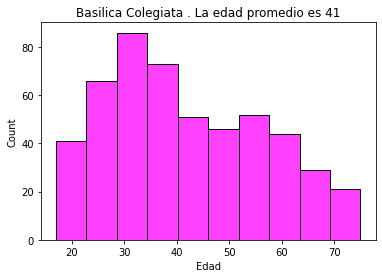

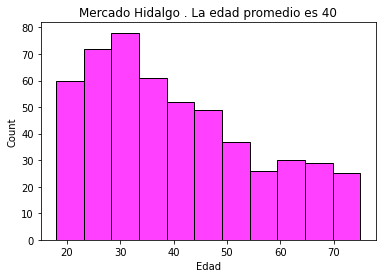

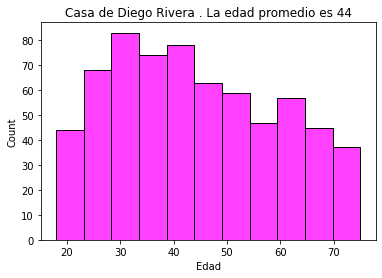

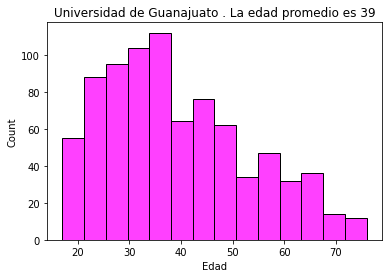

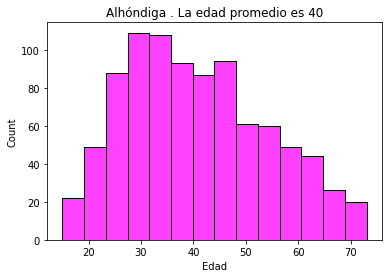

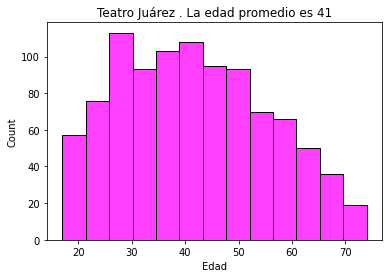

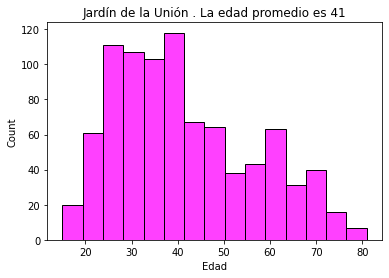

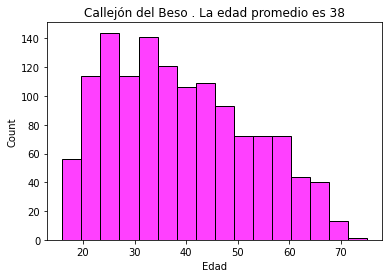

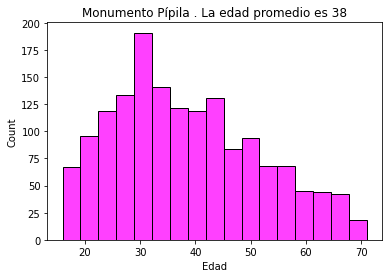

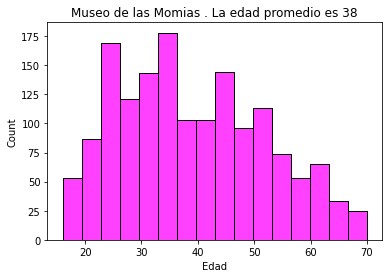

In [ ]:
i=0
for lugar in data_df:
  edades=lugar['Edad']
  #imprimimos los histogramas
  lugar=lugares[i]
  mean=np.mean(edades)
  #print("La edad promedio de sus visitantes en %s es de %i \n" %(lugar, int(mean)))
  plt.figure()
  sns.histplot(data=edades,color='magenta').set_title(lugar+'. La edad promedio es %i' %int(mean))
  plt.show()
  i=i+1

**Observación** Notemos que la edad promedio en los distintos lugares es muy parecida. Esta se acumula de los 20 a los 40.

## Procedencia de los visitantes

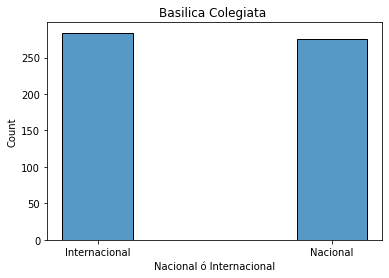

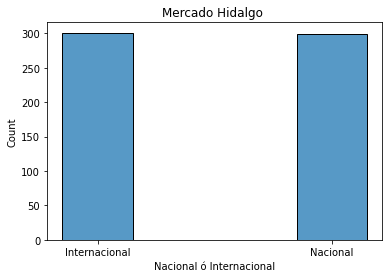

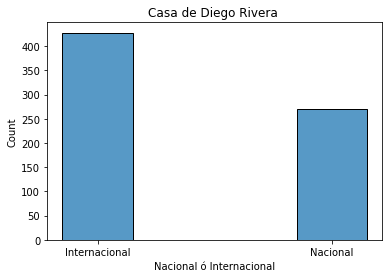

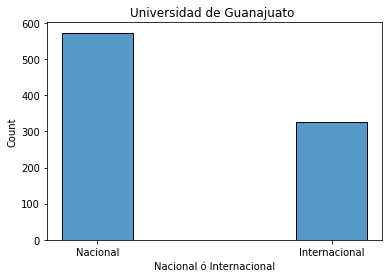

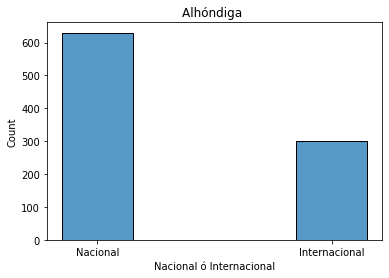

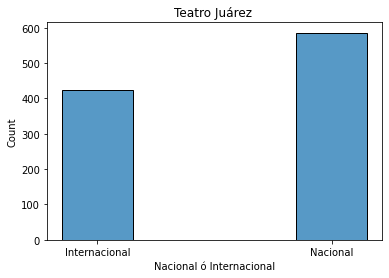

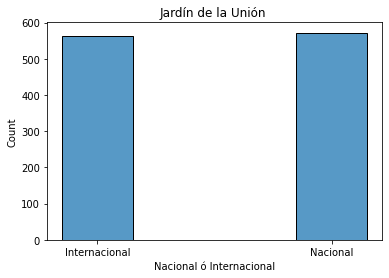

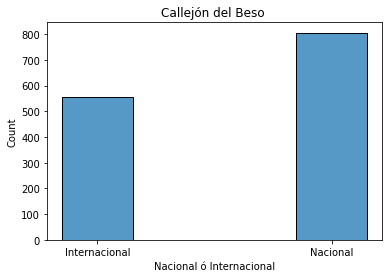

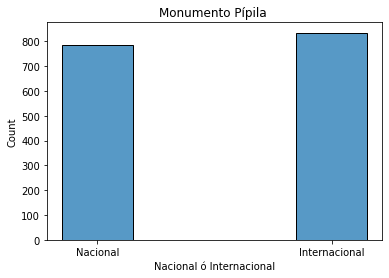

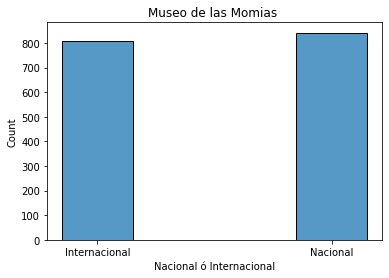

In [ ]:
i=0
for lugar in data_df:
  tipo=lugar['Nacional ó Internacional']
  #imprimimos los histogramas
  lugar=lugares[i]
  #print("La edad promedio de sus visitantes en %s es de %i \n" %(lugar, int(mean)))
  plt.figure()
  sns.histplot(data=tipo,shrink=0.3).set_title(lugar)
  plt.show()
  i=i+1

Observación: Hay lugares donde los visitantes son más internacionales, como la universidad de Guanajuato, mientras que en el callejón del beso, son más los nacionales.

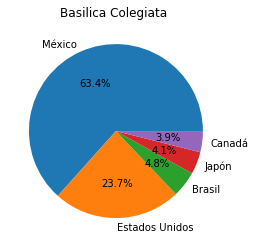

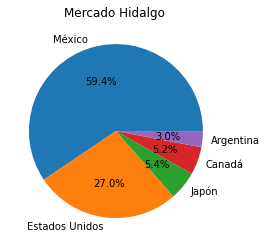

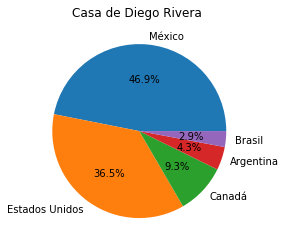

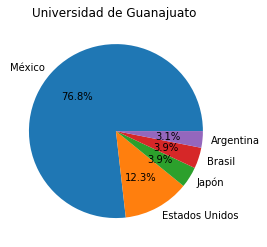

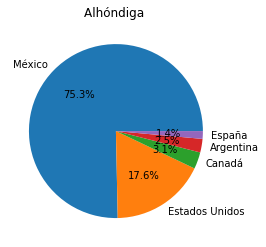

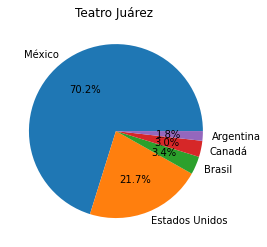

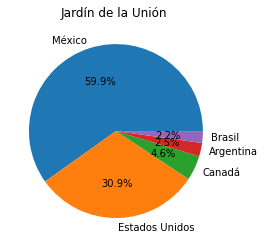

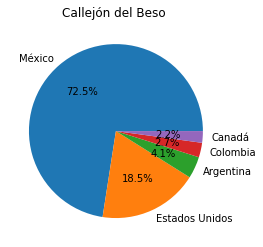

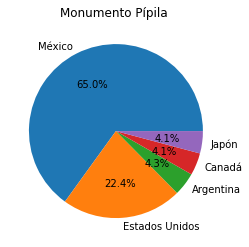

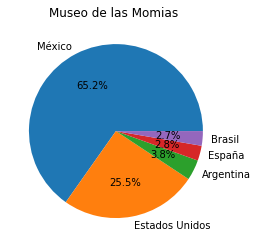

In [ ]:
#País de procedencia
i=0
for lugar in data_df:
    # Obtenemos la lista de paises
    datos=list(lugar['País'])
    #Creamos un diccionario con los paises de cada lugar y el número de visitantes de ese país
    dicti={pais: datos.count(pais) for pais in datos}
    #Ordenamos los países de acuerdo al número de visitantes provenientes de ahí
    dicti=sorted(dicti.items(), key=lambda x: x[1], reverse=True)[:5]
    #Lugares historicos
    lugar=lugares[i]
    #Creamos un gráfico de pastel para mostrar de donde provienen
    plt.figure()
    plt.pie([float(n) for _,n in dicti], labels=[str(k) for k,_ in dicti], autopct='%1.1f%%')
    plt.title(lugar)
    plt.show()
    i=i+1

**Observamos** Que en todos los lugares, los visitantes en su mayoría son nacionales, sin embargo, se había notado anteriormente que había lugares donde los internacionales sobrepasaban, esto puede ser debido a que hay mexicanos que residen en México, dado que en estas grááficas vemos que su nacionalidad en su mayoría sí es mexicana.

## Histogramas de las escalas

La escala promedio que recibió Basilica Colegiata  fue de 4 



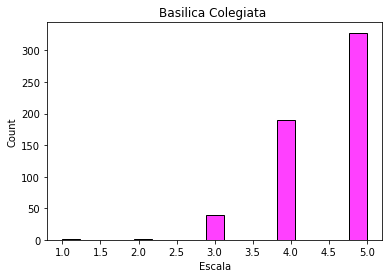

La escala promedio que recibió Mercado Hidalgo  fue de 3 



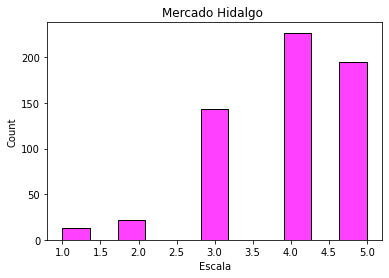

La escala promedio que recibió Casa de Diego Rivera  fue de 4 



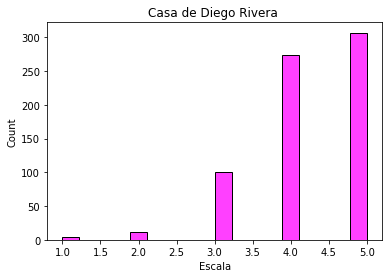

La escala promedio que recibió Universidad de Guanajuato  fue de 4 



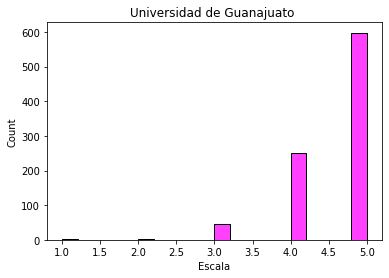

La escala promedio que recibió Alhóndiga  fue de 4 



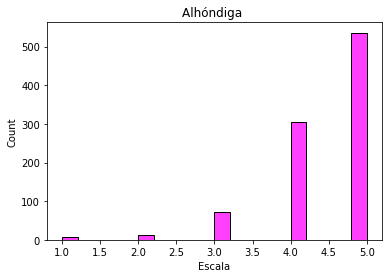

La escala promedio que recibió Teatro Juárez  fue de 4 



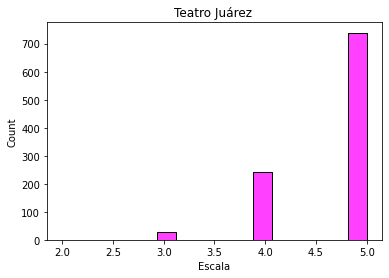

La escala promedio que recibió Jardín de la Unión  fue de 4 



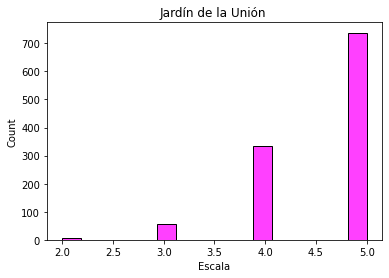

La escala promedio que recibió Callejón del Beso  fue de 3 



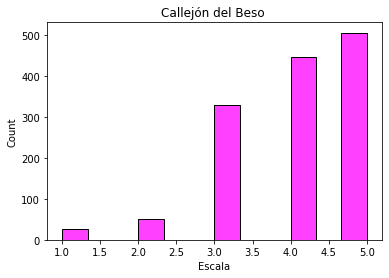

La escala promedio que recibió Monumento Pípila  fue de 4 



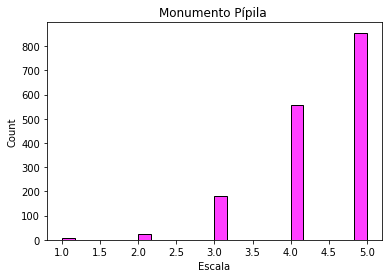

La escala promedio que recibió Museo de las Momias  fue de 3 



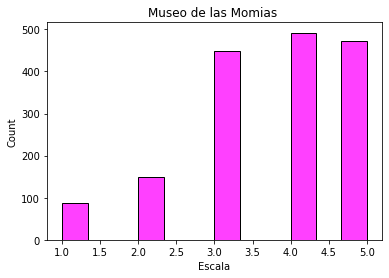

In [ ]:
i=0
for lugar in data_df:
  score=lugar['Escala']
  #imprimimos los histogramas
  lugar=lugares[i]
  mean=np.mean(score)
  print("La escala promedio que recibió %s fue de %i \n" %(lugar, int(mean)))
  plt.figure()
  sns.histplot(data=score,color='magenta').set_title(lugar)
  plt.show()
  i=i+1

## Histograma por género

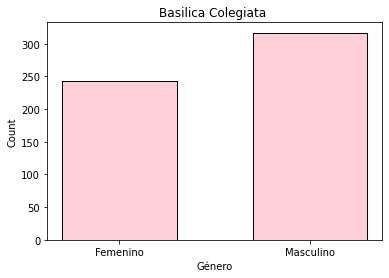

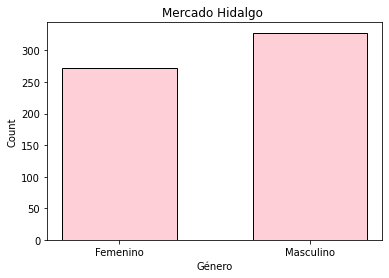

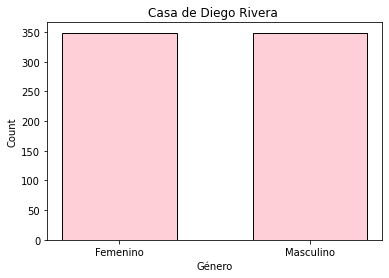

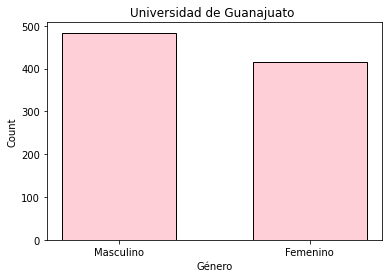

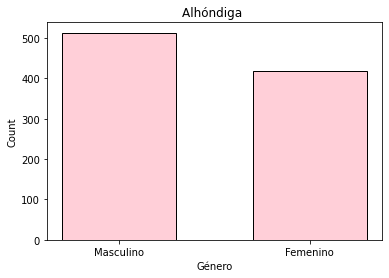

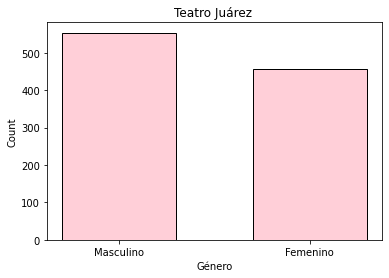

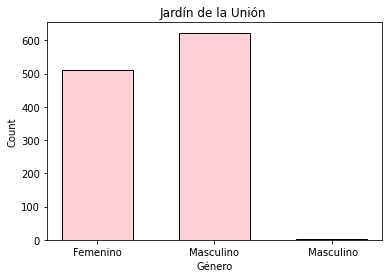

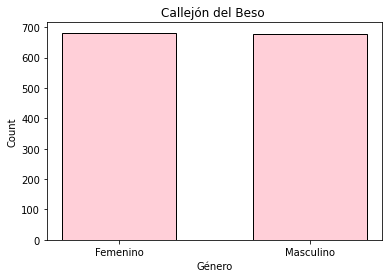

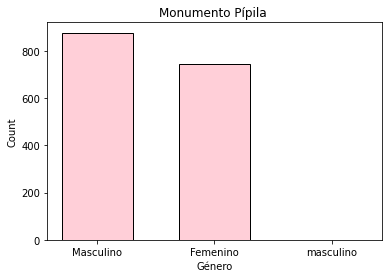

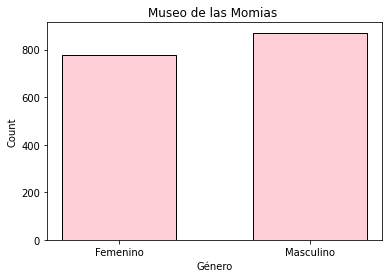

In [ ]:
i=0
for lugar in data_df:
  genero=lugar['Género']
  #imprimimos los histogramas
  lugar=lugares[i]
  plt.figure()
  sns.histplot(data=genero,color='pink',shrink=.6).set_title(lugar)
  plt.show()
  i=i+1

# 2. **Feature Selection**. Usando nubes de palabras con las 50 palabras más relevantes por sitio turístico.

In [ ]:
tokenizer= nltk.tokenize.TweetTokenizer()

In [ ]:
def build_bow(tr_text, V, dict_indices, pesado='', normaliza=False): #Binario y sin normalizar por default
  ren=len(tr_text)
  colu=len(V)

  BOW=np.zeros( (ren,colu))  #Matriz de ceros, columnas: vocabulario, renglones: texto crudo
  frecuencia=np.zeros(colu)

  cont_doc=0
  for tr in tr_text: 
          fdist_doc=nltk.FreqDist(tokenizer.tokenize(tr))

          for word in fdist_doc:
          
            if word in dict_indices:

              if pesado.lower()== "tf" or pesado.lower()== "tfidf":
                 BOW[cont_doc, dict_indices[word]]=fdist_doc[word]  #Guardamos la frecuencia de la palabra en la línea  del texto
                 frecuencia[dict_indices[word]]=frecuencia[dict_indices[word]]+1  #comparamos con su frecuencia en todo el corpus
              else:
                #Caso binario
                BOW[cont_doc, dict_indices[word]]=1 
          
          cont_doc += 1
        
  if pesado.lower()=="tfidf":
  
      for i in range(colu):
        if frecuencia[i]==0:
          BOW[:,i]=0
        else:
          BOW[:,i]=BOW[:,i]*( ren/ frecuencia[i] )
          
  if normaliza:
    for i in range(ren):
        BOW[i,:]=BOW[i,:]/ np.linalg.norm(BOW[i,:])

  return BOW

In [ ]:
#Función que construye la nube de palabras:
def word_cloud(opiniones, score,lugar):
    #Pasamos a minúúsculas cada una de las opiniones
    opiniones=[o.lower() for o in opiniones]

    V = []
    for op in opiniones:
      V += tokenizer.tokenize(op)

    #Creamos el vocabulario
    V = set(V)

    #Diccionario de palabras
    dic = {}

    #Diccionario de palabras inverso
    dic_inv = {}

    #Llenamos los diccionarios
    for idx,word in enumerate(V):
      dic[word] = idx
      dic_inv[idx] = word

    #Construimos la Bolsa de palabras
    bow = build_bow(opiniones, V, dic)

    #feature selection
    feats=SelectKBest(chi2,k=50) #las 50 máás importantes
    feats.fit(bow,score) 
    best=feats.get_support(indices=True)
    target_words=[(idx,dic_inv[idx]) for idx in best]

    #Diccionario auxiliar para crear la nube de palabras    
    aux = {}
    for t in target_words:
        aux[t[1]] = t[0]

    Nube= WordCloud(width=1200,height=700, background_color="pink",max_words=50,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(aux)
    plt.figure()
    plt.imshow(Nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(lugar)
    plt.show()

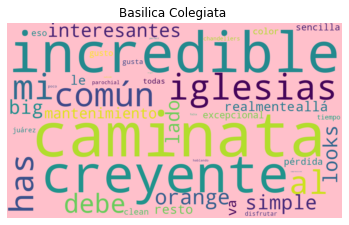

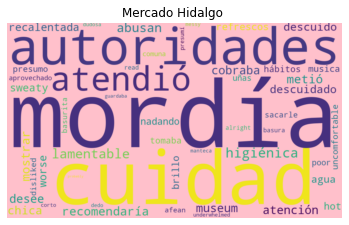

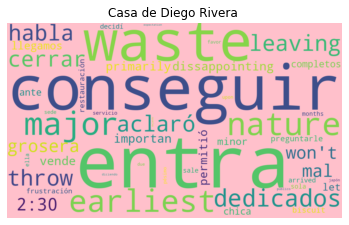

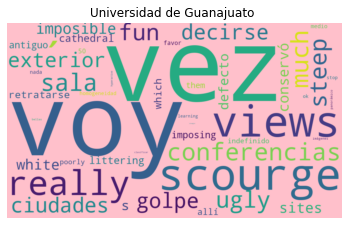

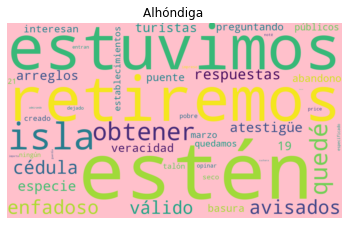

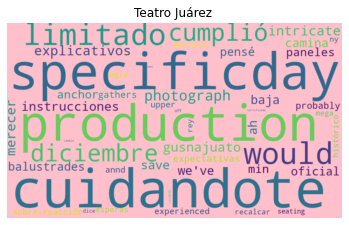

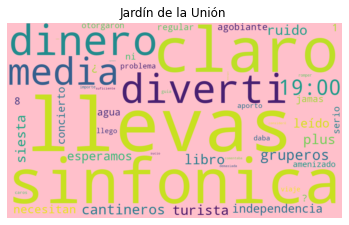

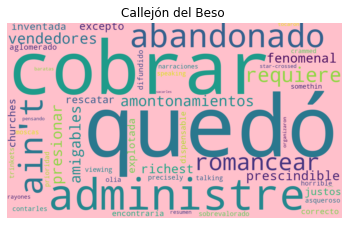

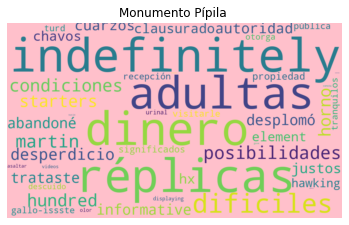

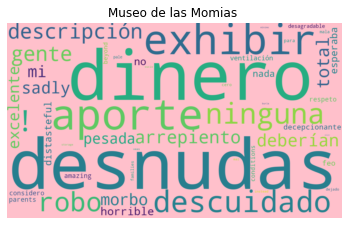

In [ ]:
i=0
for lugar in data_df:
  #Obtenemos las opiniones y las escalas
  score=np.array(lugar['Escala'])
  opiniones=list(lugar['Opinión'])
  #Obtenemos el nombre del lugar
  lugar=lugares[i]
  #print("La edad promedio de sus visitantes en %s es de %i \n" %(lugar, int(mean)))
  word_cloud(opiniones, score,lugar)
  i=i+1

# 3. LSA: Descubrimiento de 3 tópicos más relevantes y 10 palabras contenidas en cada tópico de cada uno de los siguientes tópicos. 

Tópicos:


 * Hombres
 * Mujeres
 * Turistas Nacionales
 * Turistas Internacionales
 * Jovenes
 * Mayores

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
svd=TruncatedSVD(n_components=3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def imprime_topicos(opiniones,df):
  #sub categorias
  subgrupos_full=["Hombres","Mujeres","Internacional", 'Nacional', 'Jovenes', 'Mayores']

  #Categorias principales
  subgrupos=["Género","Nacional ó Internacional","Edad"]
  

  #___________Obtenemos las opiniones por subcategoría_________________________

  #Dividimos las listas en tres[genero, nacionalidad, edad]
  #cada una contiene dos listas, por ejemplo, en la lista de genero es [opiniones de mujeres, opiniones de hombres]
  opiniones_por_genero=[]
  opiniones_por_nacionalidad=[]
  opiniones_por_edad=[]  #(20,30] Joven y (30,40] Mayor

  for n,subgrupo in enumerate(subgrupos):

    if n==0: 
      #Opiniones por género
      opiniones_por_genero.append(opiniones.loc[df[subgrupo]=='Masculino'].tolist())
      opiniones_por_genero.append(opiniones.loc[df[subgrupo]=='Femenino'].tolist())
    if n==1:
      #Opiniones por nacionalidad
      opiniones_por_nacionalidad.append(opiniones.loc[df[subgrupo]=='Internacional'].tolist())
      opiniones_por_nacionalidad.append(opiniones.loc[df[subgrupo]=='Nacional'].tolist())
    if n==2:
      #Opiniones por edad 
      opiniones_por_edad.append(opiniones.loc[ (df['Edad']>=20.0) & (df['Edad']<=30.0) ].tolist()) #Jóvenes
      opiniones_por_edad.append(opiniones.loc[ (df['Edad']>30.0) & (df['Edad']<=40.0)].tolist()) #Mayores

  #Unimos todas las opiniones
  opiniones_por_subgrupo=opiniones_por_genero+opiniones_por_nacionalidad+opiniones_por_edad

  #_______________Quitamos las stopwords____________________________-
  sw=list(set(stopwords.words("spanish")))+list(set(stopwords.words("english")))
  for k in range(6):  #6 subgrupos
      #Cada opinion la pasamos a minúsculas
      opiniones_por_subgrupo[k]=[o.lower() for o in opiniones_por_subgrupo[k]]
      for idx,opi in enumerate(opiniones_por_subgrupo[k]):
        #Partimos cada opinion en palabras
        aux=opi.split(' ')
        #Filtramos todas aquellas que no son stopwords
        aux=[word for word in aux if word not in sw]
        #Volvemos a juntar la cadena de caracteres
        aux=' '.join(aux)
        opiniones_por_subgrupo[k][idx]=aux #Actualizamos la opinion


  #___________Creamos la bolsa de palabras para cada subgrupo____________
  bows=[]
  dictionaries=[]
  for k in range(6):
      #print(k)
      bows.append( vectorizer.fit_transform(opiniones_por_subgrupo[k])  )
      dictionaries.append(vectorizer.get_feature_names())

  #LSA en cada BOW
  LSA=[]
  componentes=[]
  for m in bows:
      LSA.append(svd.fit_transform(m))
      componentes.append(svd.components_.T)

  topicos=['Topico_1','Topico_2','Topico_3']
  for idx,n_comp in enumerate(componentes):
      print("______Tópicos para la categoría %s ____________\n" %subgrupos_full[idx])
      encoding_matrix=pd.DataFrame(n_comp.T,
                                index=topicos,
                                columns=dictionaries[idx]).T
      for topico in topicos:
        aux=list(encoding_matrix.sort_values(by=topico, ascending=False)[topico].keys())[:10]
        print("Palabras en el %s" %topico)
        for palabra in aux:
          print(' '+palabra,end=' ')
          print(' ')
        print('\n')

In [ ]:
#Obtenemos las palabras y los tópicos para cada lugar
i=0
for lugar in data_df:
  #Obtenemos las opiniones
  opiniones=lugar['Opinión']
  #Obtenemos el nombre del lugar
  lugar_nombre=lugares[i]
  #Imprimimos los tópicos para cada lugar
  print('\033[1m'+"Análisis de tópicos para %s"%lugar_nombre+'\033[0m')
  imprime_topicos(opiniones,lugar)
  i=i+1

Análisis de tópicos para Basilica Colegiata 
______Tópicos para la categoría Hombres ____________

Palabras en el Topico_1
 guanajuato  
 ciudad  
 basilica  
 church  
 lugar  
 city  
 iglesia  
 centro  
 interior  
 town  


Palabras en el Topico_2
 church  
 basilica  
 city  
 beautiful  
 town  
 inside  
 one  
 the  
 see  
 this  


Palabras en el Topico_3
 town  
 virgin  
 plaza  
 the  
 virgen  
 spain  
 gift  
 rose  
 americas  
 made  


______Tópicos para la categoría Mujeres ____________

Palabras en el Topico_1
 guanajuato  
 ciudad  
 basílica  
 iglesia  
 hermosa  
 plaza  
 basilica  
 paz  
 lugar  
 virgen  


Palabras en el Topico_2
 beautiful  
 one  
 basilica  
 town  
 night  
 church  
 many  
 around  
 centre  
 inside  


Palabras en el Topico_3
 ciudad  
 centre  
 town  
 sol  
 direct  
 theatre  
 crowd  
 cervantes  
 attraction  
 bus  


______Tópicos para la categoría Internacional ____________

Palabras en el Topico_1
 guanajuato  
 basilica

# 4. Nube de palabras más asociadas sus opiniones negativas

In [ ]:
#Función que construye la nube de palabras:
def word_cloud_negativas(opiniones, score,lugar):
    #Filtramos primero las opiniones negativas mediante el score
    
    #Filtramos las opiniones negaritas
    opiniones_negativas=[op for idx, op in enumerate(opiniones) if score[idx]<3]
    score=score[score<3]
    
    opiniones=opiniones_negativas.copy()

    #Pasamos a minúúsculas cada una de las opiniones
    opiniones=[o.lower() for o in opiniones]

    V = []
    for op in opiniones:
      V += tokenizer.tokenize(op)

    #Creamos el vocabulario
    V = set(V)

    #Diccionario de palabras
    dic = {}

    #Diccionario de palabras inverso
    dic_inv = {}

    #Llenamos los diccionarios
    for idx,word in enumerate(V):
      dic[word] = idx
      dic_inv[idx] = word

    #Construimos la Bolsa de palabras
    bow = build_bow(opiniones, V, dic)

    #feature selection
    feats=SelectKBest(chi2) #las 50 máás importantes
    feats.fit(bow,score) 
    best=feats.get_support(indices=True)
    target_words=[(idx,dic_inv[idx]) for idx in best][:50]
    #print(target_words)

    #Diccionario auxiliar para crear la nube de palabras    
    aux = {}
    for t in target_words:
        aux[t[1]] = t[0]

    Nube= WordCloud(width=1200,height=700, background_color="white",max_words=50,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(aux)
    plt.figure()
    plt.imshow(Nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(lugar)
    plt.show()

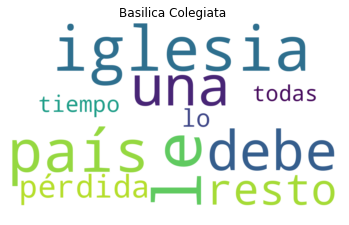

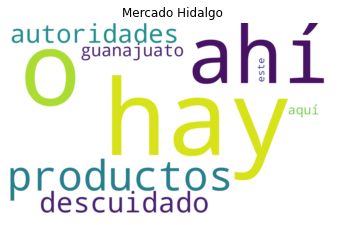

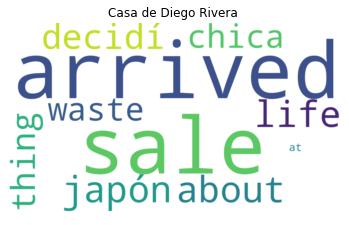

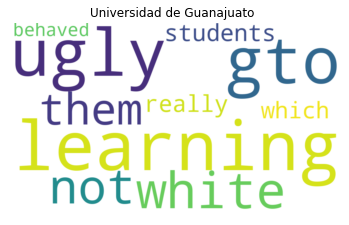

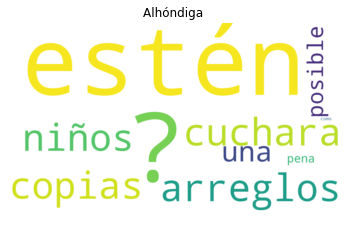

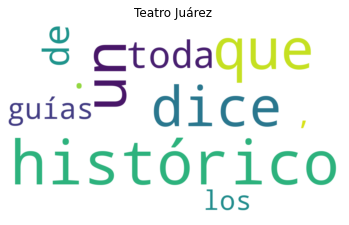

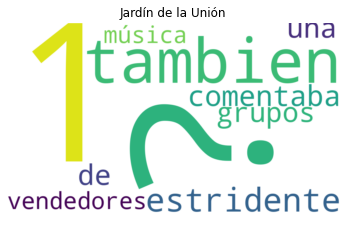

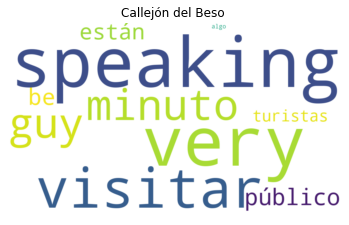

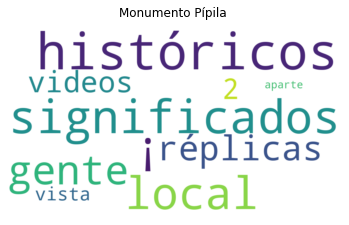

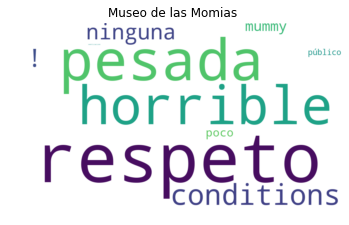

In [ ]:
i=0
for lugar in data_df:
  #Obtenemos las opiniones y las escalas
  score=np.array(lugar['Escala'])
  opiniones=list(lugar['Opinión'])
  #Obtenemos el nombre del lugar
  lugar=lugares[i]
  #print("La edad promedio de sus visitantes en %s es de %i \n" %(lugar, int(mean)))
  word_cloud_negativas(opiniones, score,lugar)
  i=i+1

# 6. Ocurrencia Temporal.

In [ ]:
def hist_dispersion(sub_df,lugar):
    #Ordenamos respecto a la fecha, con la más reciente primero
    sub_df_organizada=sub_df.sort_values(by='Fecha',ascending=False)

    #Obtenemos las opiniones
    opiniones=sub_df_organizada['Opinión'].tolist()

    #Pasamos todo a minúsculas
    opiniones=[op.lower() for op in opiniones]

    #Etiquetamos la escala
    score=np.array(sub_df_organizada['Escala'])
    score[score<3]=-1
    score[score==3]=0
    score[score>3]=1
    
    #Obtenemos la matriz bow
    tok = nltk.tokenize.TweetTokenizer().tokenize
    vec = TfidfVectorizer(tokenizer=tok)
    bow = vec.fit_transform(opiniones)

    #Obtenemos el diccionario o vocabulario
    V = vec.get_feature_names()

    #Usamos chi
    chi = chi2(bow,score)[0]

    #Creamos una tupla de las mejores 
    tuplas= [ (p,V[idx]) for idx,p in enumerate(chi)]

    #Ordenamos
    tuplas = sorted(tup, reverse=True)

    #Palabras, obtenemos las 10 mejores
    palabras = [tup[1] for tup in tuplas[:10]]
    
    #Creamos el corpus con el tokenizador
    corpus = []
    for w in opiniones:
      corpus += tok(w)

    corpus = nltk.Text(corpus)

    #plt.figure(figsize=(7, 4))  
    nltk.draw.dispersion.dispersion_plot(corpus, words, title="Histograma de dispersión para %s" %lugar)

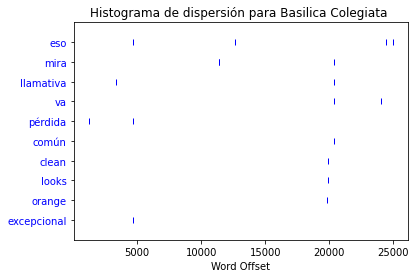

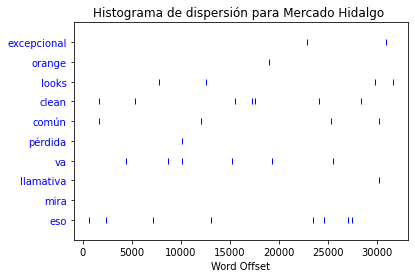

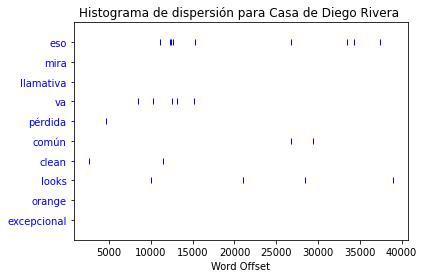

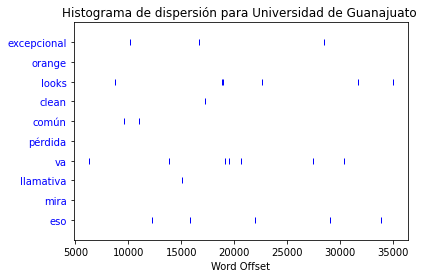

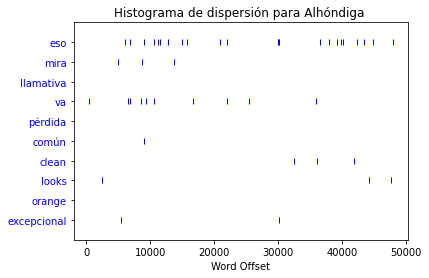

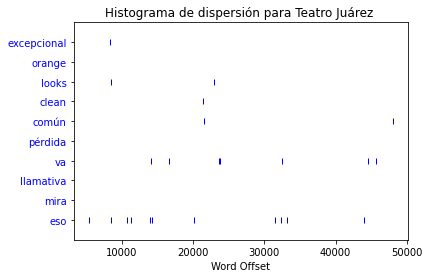

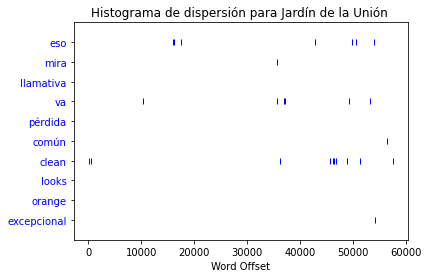

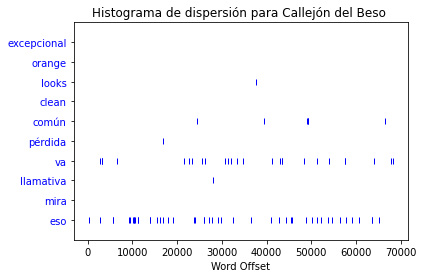

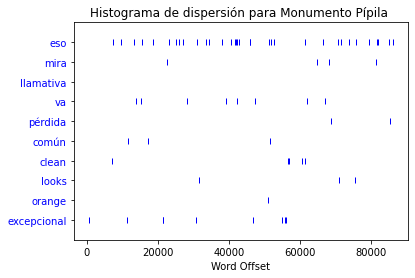

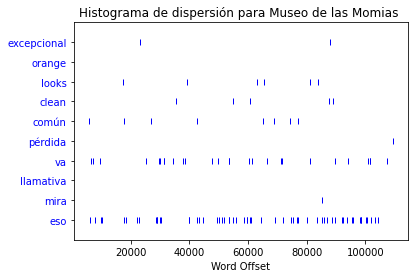

In [ ]:
i=0
for lugar in data_df:
  #Obtenemos la tabla con opiniones, escala y fecha
  sub_df=lugar[['Opinión','Escala','Fecha']]
  #Obtenemos el nombre del lugar
  lugar=lugares[i]
  #imprimimos los histogramas de dispersión
  hist_dispersion(sub_df,lugar)
  i=i+1

# Parte 2. Preguntas

## 1. **¿De los sitios turísticos, cual diría que es el más polémico y la razón de ellor?** 

El museo de las momias, porque desde las estadísticas se obtuvo que es el que tiene más escalas menores, de hecho su escala promedio fue 3.  Más aún, en las nubes de palabras aparece "desagradable", "descuidado" y "robo". Particularmente con las nubes negativas obtuvimos "conditions" de la que podemos inferir que las quejas se refieren a que no es un lugar que esté cuidado, de hecho, en los histogramas de edad, este sitio es visitado mayormente por personas en el rango de (30,40), usualmente familias, con lo que dan un mayor peso a la manutención del lugar. Sin embargo, si observamos las opiniones respecto a las escalas menores a 3, son usualmente quejas respecto lo explícito que pueden ser las presentaciones de las momias.

In [ ]:
for x in data_df[9]['Opinión'].loc[ data_df[9]['Escala']<3 ].tolist()[:-10]:
  print(x)

"Is not a place to celebrate death… they just show old dead bodies like a circus… not sure this is good for showing our culture…"
"I did not choose to visit this place, it was part of a 'city tour' that we innocently booked. These are not actually mummies - they are the disinterred corpses of a past cholera epidemic, the dead bodies of men, women and children who instead of being provided with a dignified burial were, as their families lacked the funds, instead dumped in a storage facility where unscrupulous employees began to display them to visitors interested in a grisly sight, for money. And no, this is not the anthropologically interesting reflection of Mexico's different attitude to death. I live in Santa Fe and am well familiar with the Day of the Dead, with candies in the shape of skulls etc. etc. This is an irreverent, horrible, and inexcusable disrespect of the dead bodies of people who obviously, based on their hideous grimaces, died in great agony and did not choose to be g

## 2. **En cuanto al sitio más polémico, ¿Cómo es la diferencia de opinión y temas entre turistas nacionales e internacionales?**

Se obtuvo que coinciden en ciertas palabras, de conocimiento general, como que ciertamente es un museo, y hay momias. Ambas partes también coinciden en que es un lugar interesante y que les gustó. Sin embargo, es un lugar turístico que mayoritariamente es visitado por turistas nacionales, con lo que hay más opiniones de estos. Habría que hacerse un análisis más detallado, como nubes de palabras respecto a la nacionalidad, para poder dar un mejor criterio. Con los datos obtenidos, no hay mucha diferencia respecto a su opinión del lugar. Mediante un análisis superficial, podemos observar que las opiniones de escala mínima (es decir de 1), los nacionales se quejan principalmente de la logística del lugar, mientras que los internacionales sobre la expectativa que tenían del mismo, de cualquier manera podemos decir que ambos coinciden en que hay “mejores cosas que ver”.

In [ ]:
#Museo de las momias, visitantes nacionales
for x in data_df[9]['Opinión'].loc[ (data_df[9]['Nacional ó Internacional']=='Nacional') & (data_df[9]['Escala']==1) ].tolist()[:-10]:
  print(x)

"Is not a place to celebrate death… they just show old dead bodies like a circus… not sure this is good for showing our culture…"
"¡¡¡No vayan en serio no vayan!!! No sólo es un espectáculo morboso pues las momias no tienen ni ropa ni nada que pueda considerarse un aporte cultural, además para entrar pasa uno formando horas y los alrededores o la entrada son asquerosos hay muchísima basura está más que sucio huele espantoso, no hay sanitarios, es horrible. No vayan."
"Hay muchas mejores cosas que hacer en la ciudad. Demasiado cansado para niños pequeños y adultos mayores porque las colas para entrar duran como 2 hrs y a la interperie. El recorrido es corto a menos que te detengas a ver cada mínimo detalle y leer historias macabras. La atención al turista es nula. Cero amables y todos con mala cara, pero pues entendible por la cantidad impresionante de gente que lo visita en periodo de vacaciones."
"¡Grotesco espectáculo después de dos horas de cola! Vean mejor la película del Santo con

In [ ]:
#Museo de las momias, visitantes internacionales
for x in data_df[9]['Opinión'].loc[ (data_df[9]['Nacional ó Internacional']=='Internacional') & (data_df[9]['Escala']==1) ].tolist()[:-10]:
  print(x)

"I did not choose to visit this place, it was part of a 'city tour' that we innocently booked. These are not actually mummies - they are the disinterred corpses of a past cholera epidemic, the dead bodies of men, women and children who instead of being provided with a dignified burial were, as their families lacked the funds, instead dumped in a storage facility where unscrupulous employees began to display them to visitors interested in a grisly sight, for money. And no, this is not the anthropologically interesting reflection of Mexico's different attitude to death. I live in Santa Fe and am well familiar with the Day of the Dead, with candies in the shape of skulls etc. etc. This is an irreverent, horrible, and inexcusable disrespect of the dead bodies of people who obviously, based on their hideous grimaces, died in great agony and did not choose to be gaped at by idiots for all eternity. This 'museum' i.e., chamber of horrors needs to be SHUT DOWN."
"Tengo costumbre de ver muertos

## 3.**¿Cuál diría que es el sitio que le gusta más a las mujeres y por qué?**

Basándonos en las estadísticas del principio no hubo lugar donde el mayor número de visitantes sean mujeres, sin embargo, en el callejón del beso y la casa de diego rivera obtuvieron un número muy igual en la proporción hombre/mujer. Respecto al análisis de tópicos, los hombres tienen opiniones muy neutras, es decir, solo describen el lugar, mientras que las mujeres, refieren a términos como  parejas y enamorados, de hecho, usualmente describen su experiencia en pareja. Por otro lado, en la casa de Diego Rivera, sus palabras más usadas hacen referencia al arte y la casa, sus opiniones son justamente complementos a las pinturas o la fachada de la casa. De esta manera, se infiere que el sitio que más le gusta a las mujeres es la casa de Diego Rivera, pues el callejón del beso tiene una inclinación a ser más visitada por parejas, de esta manera, si nos restringimos a las mujeres de forma independiente, elegir la casa de Diego Rivera parecer ser apropiad

In [ ]:
for x in data_df[7]['Opinión'].loc[ (data_df[7]['Género']=='Femenino') & (data_df[7]['Escala']==5) ].tolist()[:5]:
  print(x)

"La ubicación aquí es perfecta para tomar fotos. El equipo se mueve muy rápido, por lo que no tiene que sentirse desanimado por la cola. Tienen un fotógrafo que toma fotos con una cámara profesional por una tarifa, pero también puede tomar fotos con su propia cámara o teléfono móvil. Si estás en Guanajuato, este es uno de los lugares que debes visitar."
"Great location for a photo. Lines move quickly so don't get discouraged by the line. They have photographer that will take your photo with a professional camera for a fee but you can also have someone take a photo with your own camera or cell phone. One of those sites that is a must if you are ever in Guanajuato."
"Por lo general, los edificios están muy cerca, pero es especial porque los balcones a ambos lados de la acera se tocan entre sí. Es muy bueno tomar fotos en este callejón, los colores son muy coloridos, de pie en los escalones rojos, no hay turistas, si se pierde un grupo de turistas que pueden ayudarlo a tomar fotos, habrá 

In [ ]:
for x in data_df[2]['Opinión'].loc[ (data_df[2]['Género']=='Femenino') & (data_df[2]['Escala']==5) ].tolist()[:5]:
  print(x)

"We ate lunch at San Angel Inn which is next door, so we decided to stop here afterward. It was a Saturday afternoon, and there was about a 5 minute wait to enter Diego’s home. Admission was 35 pesos per person. We spent about 45 minutes touring the homes of Diego Rivera, Frida Kahlo, and Juan O’Gormon. The complex doesn’t have much of Diego’s famous artwork on display. There are some small figurines and paper mache pieces on display in his studio. When we visited, there was an exhibit about Diego’s involvement in the USSR and included his photos and sketches from his visit with the Soviets. I thought it was interesting history. Note, most information is in Spanish, but there are a few English signs summarizing the history. I wouldn’t go out of my way to visit this place, but if you are in the area, definitely stop by!"
"Me sorprendió la historia de esta casa ya que son datos que en lo personal desconocía sobre Diego rivera, hay varios bocetos originales de el. En lo personal lo que má

##4. **¿Cuál es el sitio que le gusta más a las personas jóvenes y por qué?**

Basándonos en las estadísticas del principio, y considerando que una persona jóven se encuentra en el rango [20,30], los lugares mayormente visitados son el Mercado Hidalgo y la Universidad de Guanajuato. De aquí, vemos el estudio de tópicos de ambos lugares, y notamos que para la universidad de Guanajuato, sus palabras son más para decir que se puede tomar fotos, describir su arquitectura, que es una universidad visualmente interesante y agradable. Mientras que para el Mercado Hidalgo son conceptos de que se puede comer ahí, qué puedes encontrar artesanías, describen el lugar (a comparación de los mayores, mayores a 30 años de edad, opinan más sobre su importancia histórica). Por tanto, podemos inferir que el lugar preferido por los jóvenes es el Mercado de Hidalgo. De esta manera notamos que aunque la universidad es un lugar visualmente atractivo, las personas del rango antes mencionado, buscan más lo práctico. 


In [ ]:
#Mercado de Hidalgo
for x in data_df[1]['Opinión'].loc[ (data_df[1]['Edad']>=20) & (data_df[1]['Edad']<=30) & (data_df[1]['Escala']==5) ].tolist()[:10]:
  print(x)

"El primer piso de la segunda planta, comida sencilla que están vendiendo recuerdos. Guanajuato que el precio de las cosas mucho más barato. Y mucho nahu de las figuras de cerámica para decorar la casa de Atocha. Ir a la Ciudad de México haría mothaetneunde no comprar un montón de comprar en la Ciudad de México lo hizo olgeol cuatro más. Había un pequeño cráneo visto los precios de venta se duplicó en Teotihuacan. Visita a lugares aquí y allá llegó la noche ni para comprar solicitando descender dando varias cuidado en vivo. En el primer piso de aterrizaje 15 dio lugar Carta Copa Sama pesos corte era pequeño, demasiado bueno dos veces. Enmascarado 5:00 de la mañana también estoy cerrando las tiendas de las puertas. Así que no van demasiado tarde."
"Favorite place to visit to purchase artifacts. Food outside market is good place to get a bite to eat. Everything is within walking distance. Love this city Guanajuato!!"
"Me encanta adentrarme en lugares tipicos , sobre todo para indagar en 

In [ ]:
#Mercado de Hidalgo
for x in data_df[3]['Opinión'].loc[ (data_df[3]['Edad']>=20) & (data_df[3]['Edad']<=30) & (data_df[1]['Escala']==5) ].tolist()[:10]:
  print(x)

"El lugar es fantástico y tiene una envidia arquitectónico. Para las personas que disfrutan de los edificios que miran bien hecho y tomar fotos con un fondo hermoso paisaje, es un lugar maravilloso."
"Fantástica arquitectura, nos encantó tanto la arquitectura externa como las instalaciones además fuimos en un cervantino fue increíble de verdad!"
"It is a very beautiful building with too many stairs to climb. You would be happy with your picture there."
"Primer punto a destacar es que mantienen muy limpia la zona y sus alrededores, se encuentra en perfecto estado, es hermosa y nos toco un señor nativo que se encontraba explicando la historia que es maravillosa, una verdadera obra de arte, recomendable asistir con familia ya que ds muy tranquilo y seguro, al llegar arriba la vista que se aprecia es en verdad algo hermoso que hace sentir orgulloso de ser Mexicano."
"La vista desde mi terraza de la habitacion unica, no pude entrar a la universidad por que estaba cerrada, pero por fuera es 

## 5. **¿Qué otras observaciones valiosas puede obtener de su análisis?**

Principalmente las quejas u opiniones negativas son en lugares donde se tiene que esperar mucho para entrar o acceder, como lo es el museo de las momias, el callejón del beso, o el mercado Hidalgo (por la cantidad de gente que puede haber), y que ciertamente notamos, al ver los histogramas de escala, son aquellos que obtuvieron un número significativo de escalas menores a 3. Entre ellas están que no eran lo que esperaban, como lo es el caso del museo de las momias. Por otro lado, los lugares que tienen una mejor escala, o una fluctuación mejor, son el Monumento Pípila, Jardín de la Unión, Teatro Juárez y la Alhóndiga, justamente por ser lugares amplios donde hay que formarse y/o esperar turno para entrar, de hecho, el Jardín de la unión es un punto que tiene mayor afluencia de extranjeros, lo que tiene sentido, al ser un punto donde hay varios restaurantes. No obstante, es visible que existen quejas sobre la suciedad del Monumento al Pípila. 
De hecho, podemos inferir que el lugar preferido por los visitantes es el jardín de la unión, y por distancia, podemos hacer empate con el teatro Juárez, y considerar a estos dos como uno solo. 


In [ ]:
for x in data_df[5]['Opinión'].loc[ (data_df[5]['Escala']==5) ].tolist()[:10]:
  print(x)

"Beautiful historic theater - great place for a concert. Unfortunately street performers noise bleeds through and is very distracting."
"This is the second best and nice theater in Mexico. Love this place you can take pictures Whit out a problem not like Bella's artes they charge over there is cheap to see inside this gorgeous place."
"It reminded me of being in Rome, it was a gorgeous building right in the heart of Guanajuato. The statues at the top of the building were stunning and the overall appearance was simply majestic. Located around the main Jardin, it’s impossible to miss if you’re doing any sort of sightseeing in town. Very much worth a stroll and pictures."
"This building is truly splendid, not quite, of course, as the famed Bellas Artes in Mexico City, but interesting and with great history. The pity is that almost all beautiful South American theatres rarely have more than four or five performances a month, and that even applies to Rio de Janeiro´s celebrated Teatro Munic

In [ ]:
for x in data_df[4]['Opinión'].loc[ (data_df[4]['Escala']==5) ].tolist()[:10]:
  print(x)

"Fue construida a finales del siglo XVIII, en el Mexico virreinal. Su función era como almacén y tienda de comercio para los habitantes que acudían del campo a comprar o de las haciendas a vender sus productos."
"Parada obligatoria en tu visita a la ciudad de Guanajuato, lugar lleno de historia y apto para todas las edades."
"Maravilloso sitio, muy gráfico para aprender historia super didáctico, las salas muy bellas y organizadas, el personal muy amable. Imperdible."
"El término alhóndiga proviene del árabe y significa “almacén o mercado de granos". La Alhóndiga de Granaditas es un lugar muy representativo del inicio de la lucha de Independencia, pues en este sitio tuvo lugar primera batalla insurgente y con ello el origen de la Independencia. Fue en esta batalla donde ocurrió la hazaña de Juan José de los Reyes Martínez, "El Pípila", un barretero de la mina de Mellado, quien a petición de Hidalgo se colocó una losa en la espalda para esquivar los ataques y consiguió hacer estallar la 